In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## DATA UNDERSTANDING AND LOADING

In [ ]:
df=pd.read_csv("bank.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.shape

(11162, 17)

In [ ]:

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

After doing the thorough research, we find out that The numerical features are age, balance de Duration campaign pdes previous. And the categorical columns are Maricial education default housing loan contact month P outcome deposits. Now we are going to cheque that if The Designated data types are true to itself or not

In [ ]:
df[df.columns[df.dtypes=="int64"]]

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


In [ ]:
df[df.columns[df.dtypes=="object"]]

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,no
11158,services,married,secondary,no,no,no,unknown,jun,unknown,no
11159,technician,single,secondary,no,no,no,cellular,aug,unknown,no
11160,technician,married,secondary,no,no,yes,cellular,may,failure,no


In [ ]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df["education"].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [ ]:
for i in df.select_dtypes(include="object").columns:
    print(f"column name {i}-> {df[i].unique()}, are they two in size(chance for label encoding? {df[i].nunique()==2}")

column name job-> ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student'], are they two in size(chance for label encoding? False
column name marital-> ['married' 'single' 'divorced'], are they two in size(chance for label encoding? False
column name education-> ['secondary' 'tertiary' 'primary' 'unknown'], are they two in size(chance for label encoding? False
column name default-> ['no' 'yes'], are they two in size(chance for label encoding? True
column name housing-> ['yes' 'no'], are they two in size(chance for label encoding? True
column name loan-> ['no' 'yes'], are they two in size(chance for label encoding? True
column name contact-> ['unknown' 'cellular' 'telephone'], are they two in size(chance for label encoding? False
column name month-> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'], are they two in size(chance for label encoding? False
column name poutcom

In [ ]:
for i in df.select_dtypes(include="object").columns:
    if df[i].nunique()!=2:
        print(f"{i} ->{df[i].unique()}")
        

job ->['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital ->['married' 'single' 'divorced']
education ->['secondary' 'tertiary' 'primary' 'unknown']
contact ->['unknown' 'cellular' 'telephone']
month ->['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome ->['unknown' 'other' 'failure' 'success']


In [ ]:
# WE ARE DOING TO CHECK FOR NUMERICALA DATA

In [ ]:
df.select_dtypes(include="int64").describe()


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
cols=['age', 'balance', 'day', 'duration',
       'campaign', 'pdays', 'previous']
#Distribution Analysis
cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

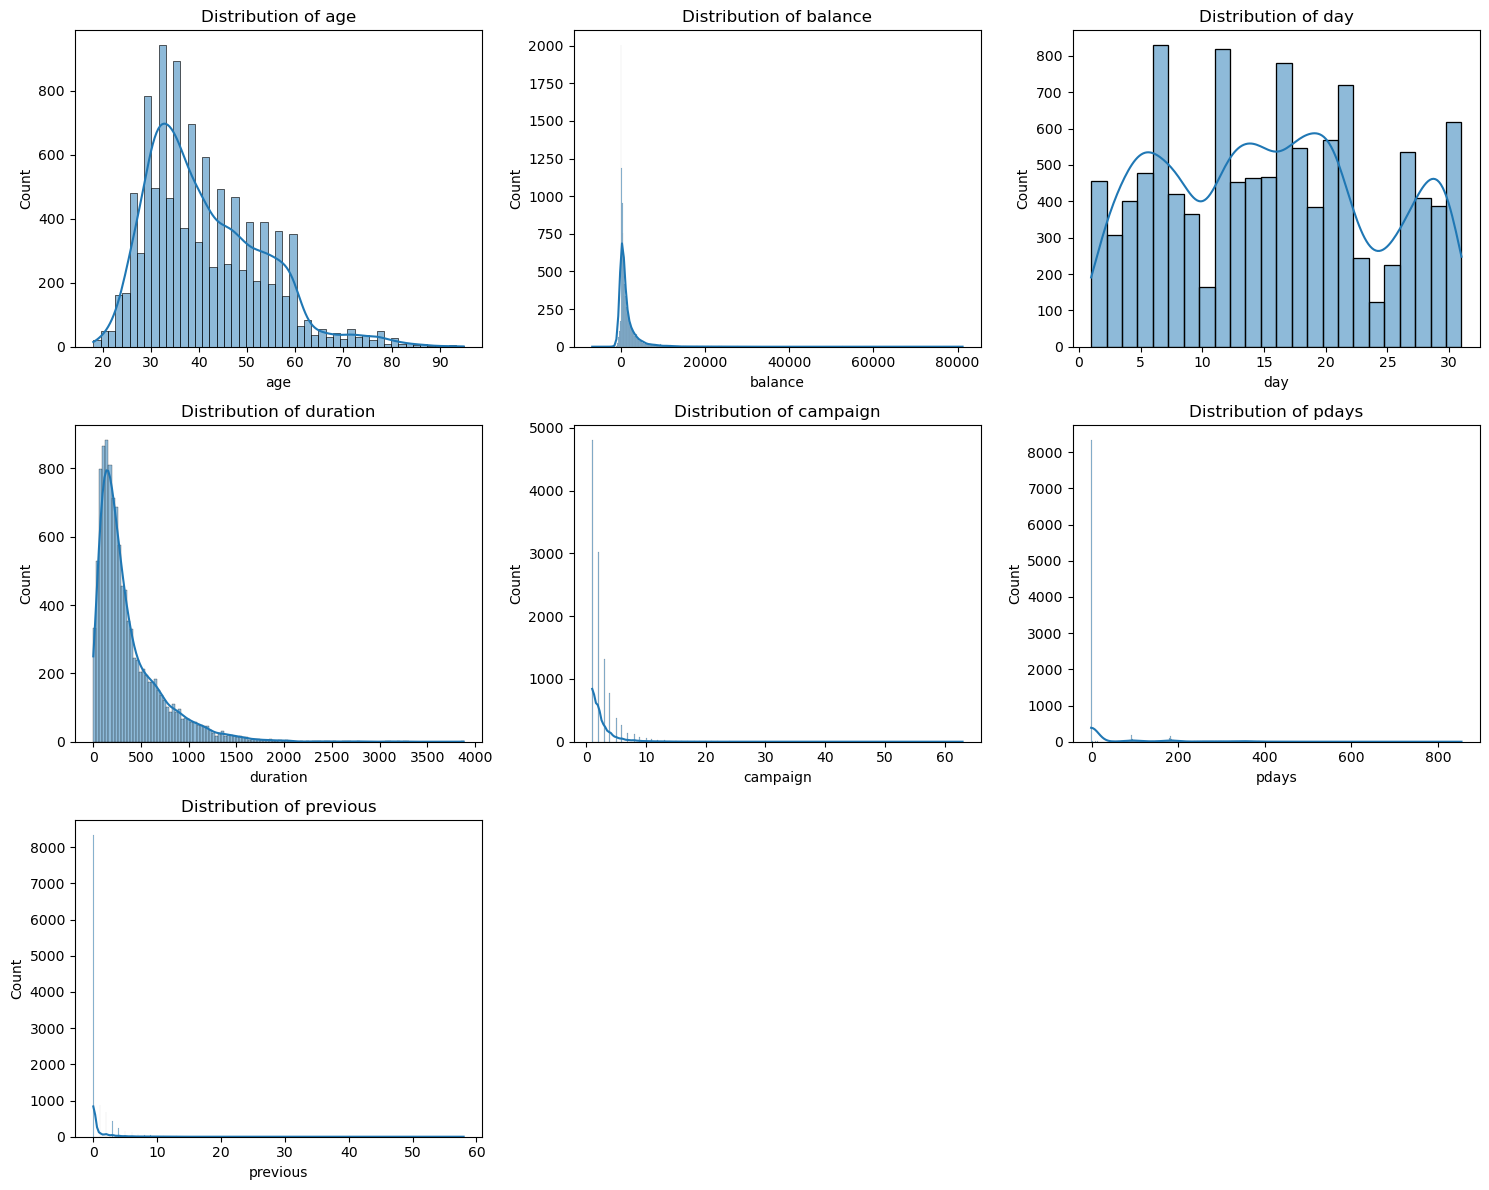

In [ ]:
plt.figure(figsize=(15, 12))
i=0
for col in cols:
    i+=1
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


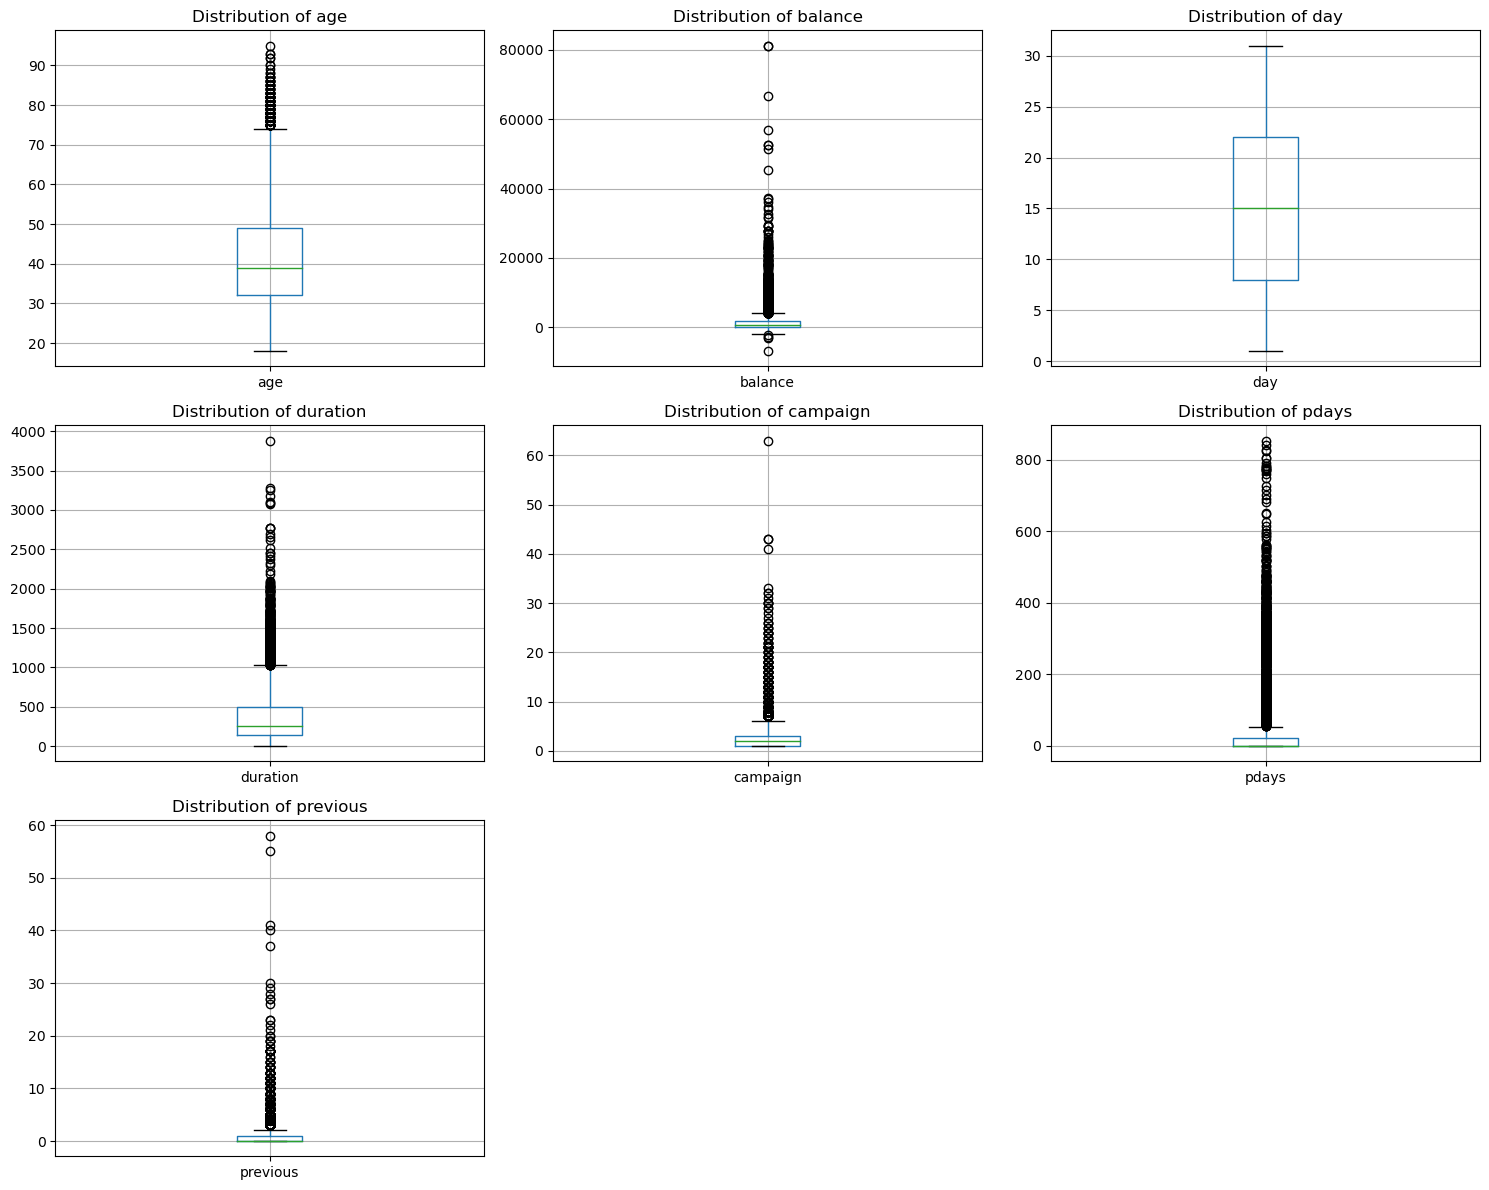

In [ ]:
plt.figure(figsize=(15, 12))
i=0
for col in cols:
    i+=1
    plt.subplot(3, 3, i)
    df.boxplot(column=[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [ ]:
df["pdays"].unique()

array([ -1, 166,  91, 147, 170, 150, 171, 126, 182, 110, 198, 174, 175,
        27, 128, 100, 177, 167, 122, 183, 195, 133, 178,  34,  10, 163,
       184, 154,  99,  93,   2, 242, 272,  76, 160,  90, 196, 246, 238,
       203, 268, 189, 267,  92,   9,  88,  85, 210, 257, 261, 270, 106,
       199, 112,  41, 294, 231, 239, 302, 135, 307, 222, 138, 323, 141,
       320, 264, 316, 315, 256, 146, 328,  74, 148, 327, 341, 145, 266,
       234, 345, 318, 325, 274, 343, 260, 305, 344, 254, 180, 340,  82,
       181, 278, 153,   4, 349, 334, 176,  87, 269,  86, 169,  83,  79,
         6, 259,  13, 161, 350,  84,  80, 164,  22, 296,  66, 263, 333,
        17,  89,  78, 286, 337, 364, 188, 342, 363, 352, 295, 353, 356,
       288, 367, 366, 359, 347, 370, 284, 300, 306, 361, 287, 301, 355,
       371, 292, 360, 358, 346, 357, 368, 312, 179, 329, 298, 372, 374,
       375, 291,  95, 109,  94,  98, 186, 101, 187, 321,  40,  96,  21,
        35,  97, 285, 103, 212, 293,  81,  38,  28,  67,  60, 12

EDA

In [ ]:
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df["deposit"].value_counts()
df["deposit"].value_counts(normalize=True) * 100


no     52.616019
yes    47.383981
Name: deposit, dtype: float64

In [ ]:
for col in df.select_dtypes(include="object").columns:
    print("\nColumn:", col)
    print(df[col].value_counts())



Column: job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

Column: marital
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

Column: education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

Column: default
no     10994
yes      168
Name: default, dtype: int64

Column: housing
no     5881
yes    5281
Name: housing, dtype: int64

Column: loan
no     9702
yes    1460
Name: loan, dtype: int64

Column: contact
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

Column: month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: i

C:\Users\manis\AppData\Local\Temp\ipykernel_13028\2693019627.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=False, cmap='coolwarm')


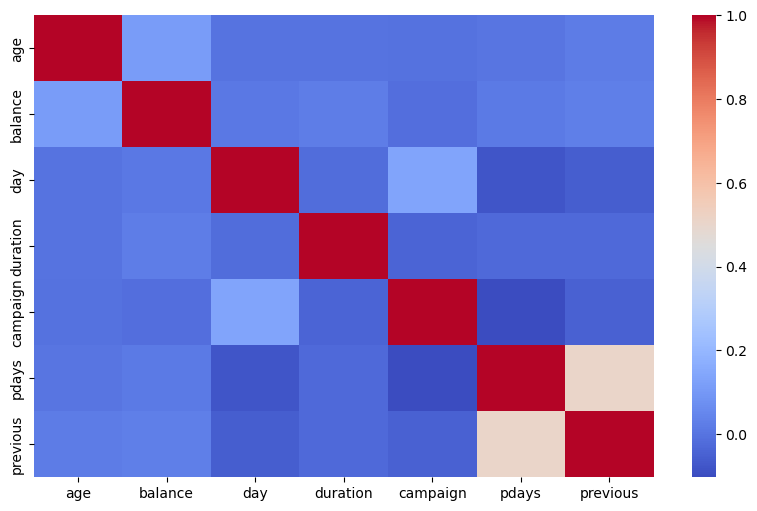

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show()


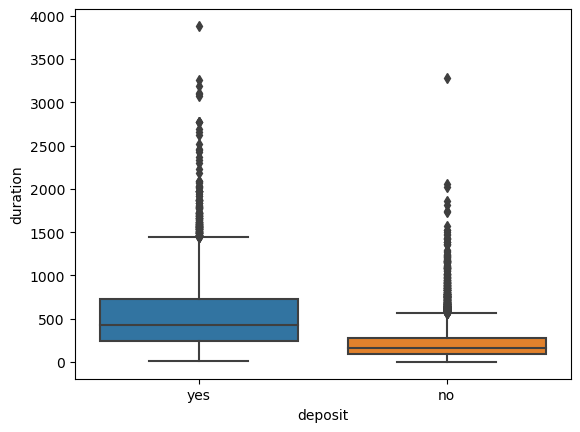

In [ ]:
sns.boxplot(x="deposit", y="duration", data=df)
plt.show()


In [ ]:
#Campaign-related Insights

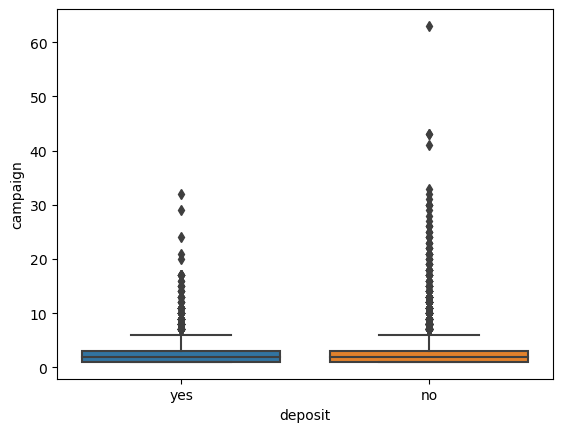

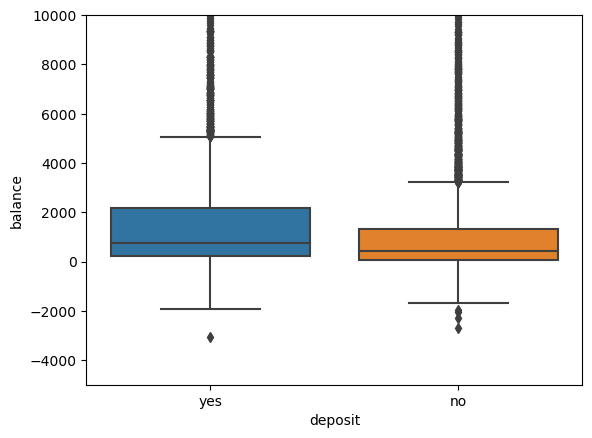

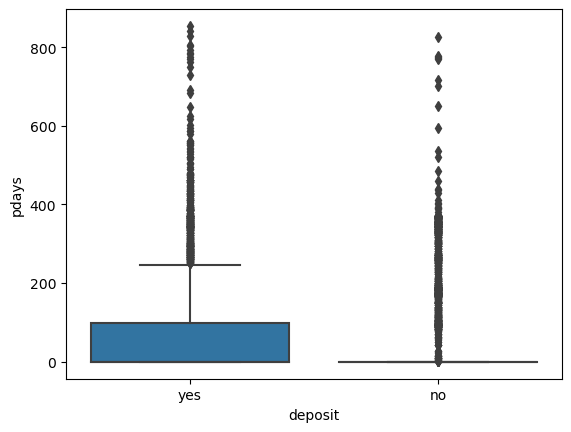

In [ ]:
sns.boxplot(x="deposit", y="campaign", data=df)
plt.show()
sns.boxplot(x="deposit", y="balance", data=df)
plt.ylim(-5000, 10000)  # to reduce extreme outlier effect
plt.show()
sns.boxplot(x="deposit", y="pdays", data=df)
plt.show()


In [ ]:
for col in df.select_dtypes(include="object").columns:
    print("\nColumn:", col)
    print(df.groupby(col)["deposit"].value_counts(normalize=True))



Column: job
job            deposit
admin.         no         0.526987
               yes        0.473013
blue-collar    no         0.635802
               yes        0.364198
entrepreneur   no         0.625000
               yes        0.375000
housemaid      no         0.602190
               yes        0.397810
management     yes        0.507015
               no         0.492985
retired        yes        0.663239
               no         0.336761
self-employed  no         0.538272
               yes        0.461728
services       no         0.600217
               yes        0.399783
student        yes        0.747222
               no         0.252778
technician     no         0.539221
               yes        0.460779
unemployed     yes        0.565826
               no         0.434174
unknown        no         0.514286
               yes        0.485714
Name: deposit, dtype: float64

Column: marital
marital   deposit
divorced  no         0.518948
          yes        0.481052

## PRE PROCESSING

### Did binary encoding so The model can easily Understand that what we have done. When it comes to model training.

In [ ]:
for i in df.columns:
    if df[i].nunique() == 2:
        df[i] = df[i].str.lower().str.strip().replace({"yes": 1, "no": 0})


In [ ]:
binary_cols = [i for i in df.columns if df[i].nunique() == 2]
print(binary_cols)


['default', 'housing', 'loan', 'deposit']


In [ ]:
df[binary_cols]

,default,housing,loan,deposit
0,0,1,0,1
1,0,0,0,1
2,0,1,0,1
3,0,1,0,1
4,0,0,0,1
...,...,...,...,...
11157,0,1,0,0
11158,0,0,0,0
11159,0,0,0,0
11160,0,0,1,0


Above we have done label Encoding in terms of Binary Encoding, so The model can accurately perform Its is classification and provide better accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import TransformerMixin, BaseEstimator

In [ ]:
df_prep = df.copy()

Normalize text columns: lower + strip

In [ ]:
for col in df_prep.select_dtypes(include="object").columns:
    df_prep[col] = df_prep[col].astype(str).str.lower().str.strip()

 Replace "unknown" with np.nan for meaningful imputation

In [ ]:
df_prep.replace("unknown", np.nan, inplace=True)

 Create pdays-related features: was_contacted flag, and keep pdays as numeric with NaNs for not-contacted

In [ ]:
df_prep['was_contacted'] = (df_prep['pdays'] != -1).astype(int)  # 1 if previously contacted, else 0
df_prep['pdays'] = df_prep['pdays'].replace(-1, np.nan)  # mark -1 as missing

In [ ]:
#Convert month -> numeric (so models can use ordering/seasonality if beneficial)
month_map = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df_prep['month_num'] = df_prep['month'].map(month_map)


In [ ]:
 #Ensure binary columns are numeric ( already replaced yes/no -> 1/0)
# If not done previously, this will convert. If already numeric, this will keep them numeric.
binary_map = {"yes":1, "no":0}
for col in ['default','housing','loan','deposit']:
    if col in df_prep.columns and df_prep[col].dtype == object:
        df_prep[col] = df_prep[col].map(binary_map).astype(float)

Decide which columns are numeric and which categorical for pipeline

In [ ]:
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'month_num']

In [ ]:
# Categorical (non-binary) columns to encode (drop binary ones here)
categorical_cols = [c for c in df_prep.select_dtypes(include="object").columns
                    if c not in ['default','housing','loan','deposit']]

In [ ]:

# Confirm lists
print("Numeric cols:", numeric_cols)
print("Categorical cols:", categorical_cols)


Numeric cols: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'month_num']
Categorical cols: ['job', 'marital', 'education', 'contact', 'month', 'poutcome']


In [ ]:


# Build numeric/categorical lists from the actual X we will feed the transformer:
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Using numeric columns:", numeric_cols)
print("Using categorical columns:", categorical_cols)

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))
])

# ColumnTransformer uses the actual columns detected above
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
], remainder='passthrough')

# Now do stratified train/test split (if not already done)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=y)

# Fit and transform safely
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed  = preprocessor.transform(X_test)

print("Transformed shapes -> X_train:", X_train_transformed.shape, "X_test:", X_test_transformed.shape)



Using numeric columns: ['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'month_num', 'was_contacted', 'default', 'housing', 'loan']
Using categorical columns: ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
Transformed shapes -> X_train: (8929, 39) X_test: (2233, 39)


In [ ]:
# 1) Build feature names from the fitted preprocessor (robust to sklearn versions)
num_names = numeric_cols  # from earlier: numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

try:
    # new API
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_input_cols = categorical_cols  # from earlier
    ohe_names = list(ohe.get_feature_names_out(cat_input_cols))
except Exception:
    # older API fallback
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    try:
        ohe_names = list(ohe.get_feature_names(cat_input_cols))
    except Exception:
        ohe_names = [f"ohe_{i}" for i in range(preprocessor.transform(X_train).shape[1] - len(num_names))]

final_feature_names = num_names + ohe_names
print("Number of features:", len(final_feature_names))

# 2) Create DataFrames for transformed arrays
import pandas as pd
X_train_df = pd.DataFrame(X_train_transformed, columns=final_feature_names)
X_test_df  = pd.DataFrame(X_test_transformed,  columns=final_feature_names)

# 3) Attach target (reset index to align)
y_train_reset = y_train.reset_index(drop=True)
y_test_reset  = y_test.reset_index(drop=True)

X_train_df['deposit'] = y_train_reset
X_test_df['deposit']  = y_test_reset

print("Train shape (with target):", X_train_df.shape)
print("Test shape  (with target):", X_test_df.shape)

# 4) Save to disk (CSV + compressed numpy)
X_train_df.to_csv("train_preprocessed.csv", index=False)
X_test_df.to_csv("test_preprocessed.csv", index=False)

import numpy as np
np.savez_compressed("preprocessed_data.npz",
                    X_train=X_train_transformed, y_train=y_train_reset.values,
                    X_test=X_test_transformed,  y_test=y_test_reset.values)

print("Saved: train_preprocessed.csv, test_preprocessed.csv, preprocessed_data.npz")


Number of features: 39
Train shape (with target): (8929, 40)
Test shape  (with target): (2233, 40)
Saved: train_preprocessed.csv, test_preprocessed.csv, preprocessed_data.npz


Trained complete